**Scope: Sessions 6 to 8; Number of marks available for Part 2: 25
How and what to submi**
1. A Jupyter Notebook with the code in all the cells executed, outputs displayed, and code documented. We expect to see all the answers in the notebook. Yes, you need to create one.
2. Name your Notebook as COM4509-6509_Assignment_Part2_Username_XXXXXX.ipynb where XXXXXX is your username such as abc18de.
3. Upload a .zip file to Blackboard before the deadline that contains two Jupyter Notebooks, one for Part 1 and one for Part 2 (COM4509-6509_Assignment_Part1_Username_XXXXXX.ipynb and COM4509-6509_Assignment_Part2_Username_XXXXXX.ipynb)
4. NO DATA UPLOAD: Please do not upload the data files used in this Notebook. We have a copy of the data already. Instead, please use a relative file path in your code (data files under folder ‘data’), as in the lab notebook so that we can run your code smoothly when needed. So ‘./data/’, instead of ‘/User/username/myfiles/mlai/assignment1/’

**Assessment Criteria**


*   Being able to build complete, reproducible machine learning pipelines from loading data to evaluating prediction performance.
*   Being able to design different machine learning models to compare/optimise prediction performance.
*   Being able to perform exploratory data analysis to gain insights. 






**A. Reproducibility & readability**

Whenever there is randomness in the computation, you **MUST** set a random seed for reproducibility. Use your **UCard number** XXXXXXXXX (or the digits in your registration number if you do not have one) as the random seed throughout this assignment.

Answers for each question should be clearly indicated in your notebook, e.g., including question numbers below in bold such as B2.1a. **All code should be clearly documented and explained.**

**Note:** You will make several design choices (e.g. hyperparameters) in this assignment. There are no “standard answers”. You are encouraged to explore several design choices to settle down with good/best ones, if time permits.


# ***B. Logistic Regression on BreastMNIST [9 marks]***

The above shows the first version of the MedMNIST, published in ISBI21 (2010.14925.pdf (arxiv.org)).

 As taken from the paper: BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign and malignant originally but in BreastMNIST, the task is simplified into binary classification by combining normal and benign as positive, and classifying them against malignant as negative. 
 
 The source dataset with a ratio of 7 : 1 : 2 into training, validation and test set. The source images of 1 × 500 × 500 are resized into 1 × 28 × 28.
We aim to train a L2-regularised logistic regression model to classify the two classes in BreastMNIST using the standard train/validation/test split with decent performance, i.e. much better than the chance level at worst.

***B1 Data loading and inspection [3 mark]***

Follow instructions at https://github.com/MedMNIST/MedMNIST to download and load the data. Display at least ten images for each class, i.e. at least 20 images, from the training set. Display at least ten images for each class from the validation set, and display at least ten images for each class from the test set.

# **B1. 1a**

In [ ]:
!pip install medmnist



# Follow instructions at https://github.com/MedMNIST/MedMNIST to download and load the data.

from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision as torchvision
import medmnist
from medmnist import INFO, Evaluator



print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

MedMNIST v2.0.2 @ https://github.com/MedMNIST/MedMNIST/


# **B1. 2a**

In [ ]:
# Load data from dataset

torch.manual_seed('001768744')

# data_flag = 'pathmnist'
data_flag = 'breastmnist'
download = True

NUM_EPOCHS = 3
BATCH_SIZE = 128
lr = 0.001

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)

vali_dataset = DataClass(split='val', transform=data_transform, download=download)


pil_dataset = DataClass(split='train', download=download)

# Datasets is categorized into 3 classes: normal, benign and malignant originally
#  but in BreastMNIST, the task is simplified into binary classification by 
#  combining normal and benign as positive, and classifying them against malignant as negative. 


# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True) #Training data
train_loader_at_eval = data.DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False) 
test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False) # testing data

val_loader = data.DataLoader(dataset=vali_dataset,batch_size=BATCH_SIZE, shuffle=False) # validation data

print(vali_dataset)

Using downloaded and verified file: /root/.medmnist/breastmnist.npz
Using downloaded and verified file: /root/.medmnist/breastmnist.npz
Using downloaded and verified file: /root/.medmnist/breastmnist.npz
Using downloaded and verified file: /root/.medmnist/breastmnist.npz
Dataset BreastMNIST (breastmnist)
    Number of datapoints: 78
    Root location: /root/.medmnist
    Split: val
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'malignant', '1': 'normal, benign'}
    Number of samples: {'train': 546, 'val': 78, 'test': 156}
    Description: The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of

# **B1. 3a:**

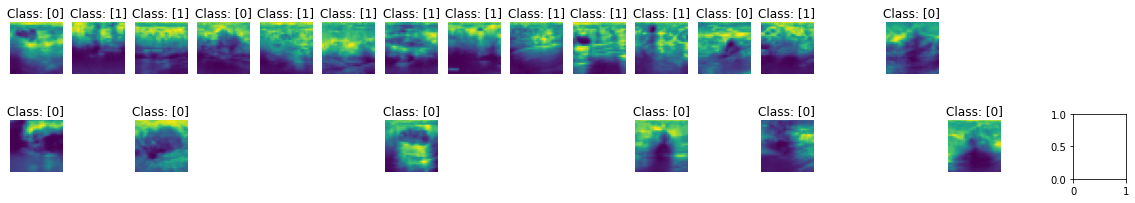

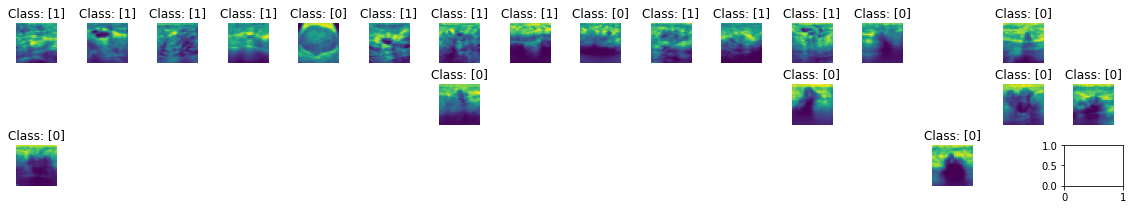

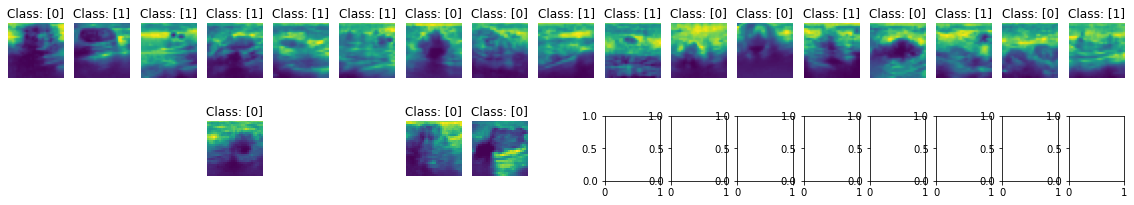

In [ ]:
import matplotlib.pyplot as plt

def dis_10img(dataset, axes):

  ax = axes.ravel()
  avali_count=0
  bvali_count=0


#  Go through every class of the dataset
  for i in range(dataset.labels.size):

    # Show 10 images for every class in the Validation dataset
    if(avali_count ==10 and bvali_count == 10):
      ax[i].axis('off')
      break
      # Visual modification, no need for x,y axis
    ax[i].axis('off')

    # check for class and if 10 images of said class were already displayed
    if(dataset.labels[i]==1 and avali_count!=10):
    
      avali_count+=1

      ax[i].imshow(dataset.imgs[i])
      ax[i].title.set_text('Class: ' + str(dataset.labels[i]))

#  check for class and if 10 images of said class were already displayed
    elif(dataset.labels[i] == 0 and bvali_count != 10):
      bvali_count+=1

      ax[i].imshow(dataset.imgs[i])
      ax[i].title.set_text('Class: ' + str(dataset.labels[i]))

  

    ax[i].axis('off')

    

_,axes = plt.subplots(2, 18, figsize=(20,3))

dis_10img(vali_dataset,axes)

plt.subplots_adjust(hspace=0.5)                                    
plt.show()

# Show 10 images for every class in the Training dataset
_,axes1 = plt.subplots(3, 16, figsize=(20,3))

dis_10img(train_dataset, axes1)

plt.subplots_adjust(hspace=0.5)                                    
plt.show()

# Show 10 images for every class in the Testing dataset
_,axes2 = plt.subplots(2, 17, figsize=(20,3))

dis_10img(test_dataset, axes2)

plt.subplots_adjust(hspace=0.5)                                    
plt.show()



#***B2 Logistic regression [4 marks]***



Keep a record of the three metrics M1 to M3 below for the two models below:
**M1)** Training accuracy: the prediction accuracy of a trained model on the training dataset.
**M2)** Validation accuracy: the prediction accuracy of a trained model on the validation dataset.
**M3)** Testing accuracy: the prediction accuracy of a trained model on the test dataset.

Using the **built-in logistic regression functions** in scikit-learn, train a logistic regression model with **L2 regularisation** on the training set, use the validation set to choose **a good regularisation parameter** (a hyperparameter) from at least three choices, and test the chosen model on the test set. Report the three metrics **M1** to **M3** [2 marks]

**Using PyTorch** (**see Question 5 of Lab 6**), train a logistic regression model with **L2 regularisation** on the training set, use the validation set to choose a good regularisation parameter (a hyperparameter) from at least three choices, and test the chosen model on the test set. Report the three metrics M1 to M3 [2 marks]

# **B2. 1a:**

In [ ]:
# # create the logistic regression model using SKLearn
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.preprocessing import StandardScaler

a= np.reshape(train_dataset.imgs, [546,28*28]) #reshape the values of each dataset from a 3d array, to a 2d array

b = np.reshape(test_dataset.imgs, [156,28*28])  #reshape the values of each dataset from a 3d array, to a 2d array

reg = np.reshape(vali_dataset.imgs, [78,28*28]) #reshape the values of each dataset from a 3d array, to a 2d array

count=0
tmp=-1000
for (C, rid) in enumerate(reg):
  print(count)
  print(rid[C])
  # Check that only 3 values are picked from the validation dataset regularisation parameter
  if count == 3:
    break
 
   # Check that the value is possitive  
  elif rid[C]>0:
      #  Building and fitting the Ridge Regression model
      count+=1
      # Use Ridhe Regression penalty for the logistic regression
      LR_L2 = LogisticRegression(penalty='l2', C=rid[C],solver = 'sag',max_iter=3800) #Need a considerabkle amount of iterations, to get an accurate claculation of Accuracy scores

      LR_L2.fit(a , train_dataset.labels.ravel())  #Fit the data with the image values of the trainnig datest

      if(tmp < LR_L2.score(b , test_dataset.labels)):
        tmp=LR_L2.score(b , test_dataset.labels)
        print( 'Accuracy TEST score for now:', tmp)#Show temporary score regarding the prediction of values the predicted 
  else:
      rid[C]= rid[C] * -1 #Turn value into being possitive
      count+=1
      LR_L2 = LogisticRegression(penalty='l2', C=rid[C],solver = 'sag', max_iter=3800) 

      LR_L2.fit(a , train_dataset.labels.ravel())
      if(tmp < LR_L2.score(b , test_dataset.labels)) :
        tmp=LR_L2.score(b , test_dataset.labels)
        print( 'Accuracy TEST score for now:', tmp) #Show temporary score regarding the prediction of values the predicted 

print( 'Model Accuracy TEST score FINAL:', tmp) #Show score regarding the prediction of values that were tried to get the best accuracy score

y_pred_train = LR_L2.predict(a)
y_pred_test = LR_L2.predict(b)
y_pred_vali = LR_L2.predict(reg)

from sklearn.metrics import mean_squared_error

#Apply formula function for the mean square error, which takes in the true value of a dataset and it's prediction made by the trainned model
train_mse = mean_squared_error(train_dataset.labels, y_pred_train) 
test_mse = mean_squared_error(test_dataset.labels, y_pred_test)
valid_mse = mean_squared_error(vali_dataset.labels, y_pred_vali)

print('\nM1) Training accuracy:', train_mse)
print('M2) Validation accuracy: ', valid_mse)
print('M3) Testing accuracy: ', test_mse)

0
177
Accuracy TEST score for now: 0.7564102564102564
1
123
2
180
3
168
Model Accuracy TEST score FINAL: 0.7564102564102564

M1) Training accuracy: 0.0
M2) Validation accuracy:  0.14102564102564102
M3) Testing accuracy:  0.24358974358974358


# **B2. 2a:**

In [ ]:

# Define it as a class in order to use a multitude of functions integrated inside of it
# Similar to the LR from the SKlearn packet
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, num_classes ):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        outputs = torch.sigmoid(self.linear(x))
        return outputs

# Initializing the hyperparameters 
epochs = 20000  # How many times data should go through the regression
input_dim = 784  #Size of 28*28 (image dimenisons merged together)
output_dim = 1  
learning_rate = 0.01

model = LogisticRegression(input_dim,output_dim)

criterion = torch.nn.BCELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

X_train, X_test = torch.Tensor(a),torch.Tensor(b)
y_train, y_test = torch.Tensor(train_dataset.labels.ravel()),torch.Tensor(test_dataset.labels.ravel())

# X_train = train_dataset.imgs
# X_test = test_dataset.imgs
# y_train = train_dataset.labels
# y_test = test_dataset.labels

losses = []
losses_test = []
Iterations = []
iter = 0

for epoch in tqdm(range(int(epochs))): #Training through every epoch
    x = X_train
    labels = y_train
    optimizer.zero_grad() # Setting our stored gradients equal to zero
    outputs = model(X_train)
    loss = criterion(torch.squeeze(outputs), labels) 
    
    loss.backward() # Computes the gradient of the given tensor w.r.t. graph leaves 
    
    optimizer.step() # Updates weights and biases with the optimizer (SGD)
    
    iter+=1
    if iter%10000==0:
        # calculate Accuracy
        with torch.no_grad():
            # Calculating the loss and accuracy for the test dataset
            correct_test = 0
            total_test = 0

            outputs_test = torch.squeeze(model(X_test))
            loss_test = criterion(outputs_test, y_test)
            
            predicted_test = outputs_test.round().detach().numpy()
            total_test += y_test.size(0)

            correct_test += np.sum(predicted_test == y_test.detach().numpy())

            accuracy_test = 100 * correct_test/total_test
            losses_test.append(loss_test.item())
            
            # Calculating the loss and accuracy for the train dataset
            total = 0
            correct = 0

            total += y_train.size(0)
            correct += np.sum(torch.squeeze(outputs).round().detach().numpy() == y_train.detach().numpy())

            accuracy = 100 * correct/total

            losses.append(loss.item())
            Iterations.append(iter)

            # Calculating the loss and accuracy for the validation dataset
            def compute_accuracy(y_true, y_pred):
              correct_predictions = 0

            # iterate over each label and check
              for true, predicted in zip(y_true, y_pred):
                if true == predicted:
                  correct_predictions += 1
                   # compute the accuracy
                  accuracy = correct_predictions/len(y_true) 
              return accuracy

            
            print(f"Iteration: {iter}. \nTest - Loss: {loss_test.item()}. Accuracy: {accuracy_test}")
            print(f"Train -  Loss: {loss.item()}. Accuracy: {accuracy}\n")
            # print(f"Validation -  Loss: {loss.item()}. Accuracy: {accuracy}\n")

 52%|█████▏    | 10343/20000 [00:05<00:04, 1964.22it/s]

Iteration: 10000. 
Test - Loss: 26.923076629638672. Accuracy: 73.07692307692308
Train -  Loss: 26.923076629638672. Accuracy: 73.07692307692308



100%|██████████| 20000/20000 [00:10<00:00, 1943.95it/s]

Iteration: 20000. 
Test - Loss: 26.923076629638672. Accuracy: 73.07692307692308
Train -  Loss: 26.923076629638672. Accuracy: 73.07692307692308



# ***B3 Performance comparison (2 marks)***




*  Summarise each of the three metrics from the two chosen models in B2 using one or more bar graphs. [1 mark]
*  Describe at least two observations interesting to you. [1 mark]

**B3. a1:**

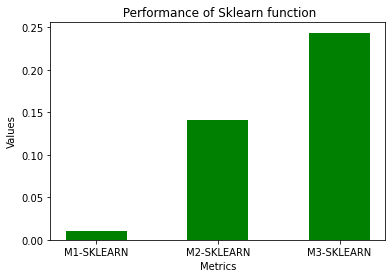

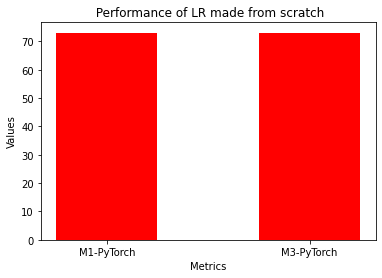

In [ ]:
#BAR GRAPHS
data_dict = {'M1-SKLEARN':train_mse+0.01, 'M2-SKLEARN':valid_mse, 'M3-SKLEARN':test_mse} 

# Take the keys as identifiers of data types
courses = list(data_dict.keys())
values = list(data_dict.values())

data_dict1 = {'M1-PyTorch':accuracy , 'M3-PyTorch':accuracy_test }


# Take the keys as identifiers of data types
courses1 = list(data_dict1.keys())
values1 = list(data_dict1.values())

#  Bar Plot for the Sklearn LR function performance
plt.bar(courses, values, color ='green',
        width = 0.5)

plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title(" Performance of Sklearn function")
plt.show()

#  Bar Plot for the LR functions made from scratch
plt.bar(courses1, values1 , color ='red',
        width = 0.5)
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title(" Performance of LR made from scratch")
plt.show()

**Observation 1:** The SkLearn version of the Logistical Regressor returned smaller values than the one made from scratch.

**Observation 2:** M1-PyTorch and M3-Pythorch have similar values, even tho they have 70x difference from their skleanr counterparts.

# **C. Convolutional Neural Networks on OCTMNIST [8 marks]**


**OCTMNIST** is based on a prior dataset of 109,309 valid optical coherence tomography (OCT) images for retinal diseases, with 4 different types, leading to a multi-class classification task. The source training set is split with a ratio of 9 : 1 into training and validation sets, and uses its source validation set as the test set. The source images are single channel, and their sizes are (384−1, 536)×(277−512), which are center-cropped and resized to 1 × 28 × 28.

**Note**: The paragraph above is describing how the authors construct OCTMNIST from the source dataset, provided as background information. You do not have to use this information to complete this question. OCTMNIST has fixed training, validation, and test sets with respective APIs so you just need to use the provided API and splits in OCTMNIST. 

**C1 Data loading and inspection [2 mark]**
Follow instructions at https://github.com/MedMNIST/MedMNIST to download and load the data. Display at least ten images for each class, i.e. at least 40 images, from the training set. 

# **C1. a1:**

In [ ]:
# Load OCTMNIST
data_flag = 'octmnist'
download = True

NUM_EPOCHS = 10
BATCH_SIZE = 128
lr = 0.01

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# load the data
train_dataset_tr = torchvision.datasets.MNIST(root = './data/OCTMNIST',download = True,train = True,transform=data_transform)

test_dataset_tr = torchvision.datasets.MNIST(root='./data/OCTMNIST', train=False, download=True, transform=data_transform)

vali_dataset_tr = torchvision.datasets.MNIST(root='./data/OCTMNIST', train=True, download=True, transform=data_transform)


train_dataset_old = DataClass(split='train', transform=data_transform, download=download)
test_dataset_old = DataClass(split='test', transform=data_transform, download=download)

vali_dataset_old = DataClass(split='val', transform=data_transform, download=download)


pil_dataset_old = DataClass(split='train', download=download)


# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True) #Training data
train_loader_at_eval = data.DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False) 
test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False) # testing data

val_loader = data.DataLoader(dataset=vali_dataset,batch_size=BATCH_SIZE, shuffle=False) # validation data

#  print(vali_dataset.data.size())


Using downloaded and verified file: /root/.medmnist/octmnist.npz
Using downloaded and verified file: /root/.medmnist/octmnist.npz
Using downloaded and verified file: /root/.medmnist/octmnist.npz
Using downloaded and verified file: /root/.medmnist/octmnist.npz


# **C1. a2:**

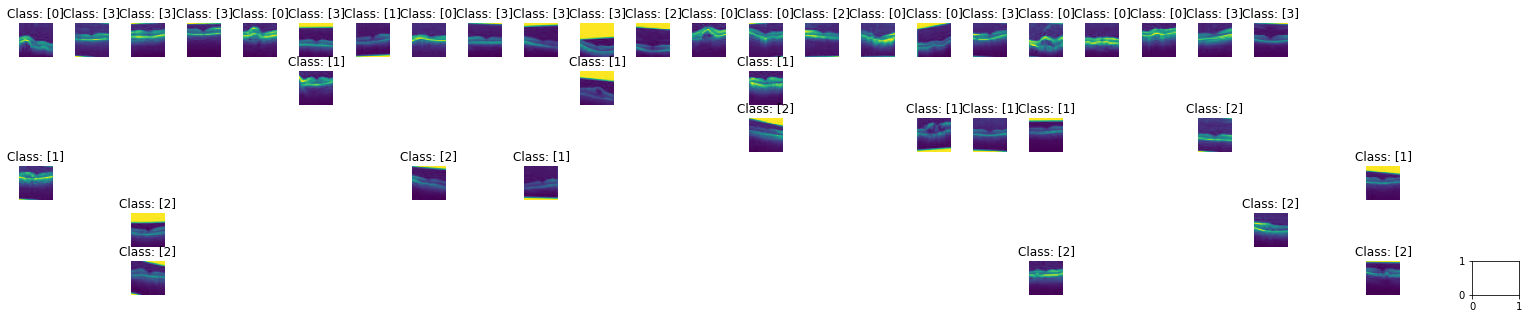

In [ ]:
def dis_10img(dataset, axes):

  ax = axes.ravel()
  avali_count=0
  bvali_count=0
  cvali_count=0
  dvali_count=0


#  Go through every class of the dataset
  for i in range(dataset.labels.size):
    # Every class has 10 images displayed
    if(avali_count ==10 and bvali_count == 10 and cvali_count==10 and dvali_count == 10):
      ax[i].axis('off')
      break
      
      # Visual modification, no need for x,y axis
    ax[i].axis('off')

    # check for class and if 10 images of said class were already displayed
    if(dataset.labels[i]==1 and avali_count!=10):
    
      avali_count+=1

      ax[i].imshow(dataset.imgs[i])
      ax[i].title.set_text('Class: ' + str(dataset.labels[i]))

    # check for class and if 10 images of said class were already displayed
    elif(dataset.labels[i] == 0 and bvali_count != 10):
      bvali_count+=1

      ax[i].imshow(dataset.imgs[i])
      ax[i].title.set_text('Class: ' + str(dataset.labels[i]))

      # check for class and if 10 images of said class were already displayed
    elif(dataset.labels[i] == 2 and cvali_count != 10):
      cvali_count+=1

      ax[i].imshow(dataset.imgs[i])
      ax[i].title.set_text('Class: ' + str(dataset.labels[i]))

    # check for class and if 10 images of said class were already displayed
    elif(dataset.labels[i] == 3 and dvali_count != 10):
      dvali_count+=1

      ax[i].imshow(dataset.imgs[i])
      ax[i].title.set_text('Class: ' + str(dataset.labels[i]))
  
# Show 10 images for every class in the Training dataset
_,axes = plt.subplots(6, 27, figsize=(27,5))

dis_10img(train_dataset_old, axes)

# Plot adjust the heigth space between images
plt.subplots_adjust(hspace=0.4)                                    
plt.show()



# **C2 Convolutional neural networks [4 marks]**

Keep a record of the four metrics M1 to M4 below for the two models below:

**M1)** Training accuracy: the prediction accuracy of a trained model on the training dataset.
**M2)** Validation accuracy: the prediction accuracy of a trained model on the validation dataset.
**M3)** Testing accuracy: the prediction accuracy of a trained model on the test dataset.
**M4)** Training time: the time taken to train the model (i.e. to learn/estimate the learnable parameters) on the training dataset.

This question asks you to design** convolutional neural networks (CNNs)**. Only the number of **convolutional (Conv**) **layers** and the number of fully connected (FC) layers will be specified below. You are free to design other aspects of the network.

** For example,** you can use other types of operation (e.g. padding), layers (e.g. pooling, or preprocessing (e.g. augmentation), and you choose the number of units/neurons in each layer. Likewise, you may choose the number of epochs and many other settings according to your accessible computational power. 

**Design a CNN with two Conv layers and two FC layers.** Train the model on the training set, use the validation set to choose the best design among at least three different choices, and test the chosen model on the test set. Report the four metrics M1 to M4 [2 marks]

**Design a CNN with three Conv layers and three FC layers.** Train the model on the training set, use the validation set to choose the best design among at least three different choices, and test the chosen model on the test set. Report the four metrics M1 to M4 [2 marks]

# **C2. a1:**

In [ ]:
class Con2(nn.Module):

  def __init__(self):
        super(Con2, self).__init__()
        # Convolutional Neural Network Layer 
        self.layers = nn.Sequential(
                # Define 2D layers

                #  calculate the output size of each convolutional layer using the following formula:
                # outputOfEachConvLayer = [(in_channel + 2*padding - kernel_size) / stride] + 1

                # We have in_channels=1 because our input is a grayscale image
                nn.Conv2d(in_channels=1, out_channels=12, kernel_size=3, padding=1, stride=1), # (N, 1, 28, 28) 
                nn.ReLU(),

                # After the first convolutional layer the output of this layer is:
                # [(28 + 2*1 - 3)/1] + 1 = 28. 

                nn.MaxPool2d(kernel_size=2), 
                # Since we applied maxpooling with kernel_size=2 we have to divide by 2, so we get
                # 28 / 2 = 14
          
                # output of our second conv layer
                nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, padding=1, stride=1),
                nn.ReLU(),

                # After the second convolutional layer the output of this layer is:
                # [(14 + 2*1 - 3)/1] + 1 = 14. 

                nn.MaxPool2d(kernel_size=2) 

                # Since we applied maxpooling with kernel_size=2 we have to divide by 2, so we get
                # 14 / 2 = 7
        )

        # Linear layer
        self.linear_layers = nn.Sequential(
                # We have the output_channel=24 of our second conv layer, and 7*7 is derived by the formula 
                # which is the output of each convolutional layer
                nn.Linear(in_features=24*7*7, out_features=64),          
                nn.ReLU(),
                nn.Dropout(p=0.2), # Dropout with probability of 0.2 to avoid overfitting
                nn.Linear(in_features=64, out_features=10) # The output is 10 which should match the size of our class
        )

    # Defining the forward pass 
  def forward(self, x):
        x = self.layers(x)
        # After calculating the output of the convolutional layer it must be flattened or rearrange the output into a vector
        x = x.view(x.size(0), -1)
        # Then pass it through the linear layer
        x = self.linear_layers(x)
        return x

model = Con2() #Object initialization for the class

device = ("cuda" if torch.cuda.is_available() else "cpu")# used to increase the processing speed and shorten runtime, makes use of strong GPU if available
model.to(device)

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum =0.09)
criterion = nn.CrossEntropyLoss()#ptimisation is done with stochastic gradient descent, or optim.SGD.
# The first argument is the parameters of the neural network: i.e. giving the optimiser something to optimise. 

epochs = 20
train_loss, val_loss = [], []
accuracy_total_train, accuracy_total_val = [], []

for epoch in range(epochs):
   
  total_train_loss = 0
  total_val_loss = 0

  model.train()
  pred =0
  total = 0
  
  # training the model
  for idx, (image, label) in enumerate(train_loader):

        image, label = image.to(device), label.to(device) #separate images values from classes

        optimizer.zero_grad()

        pred = model(image)
        loss = criterion(pred, label)
        total_train_loss += loss.item()

        loss.backward()
        optimizer.step() # STart optimization and calculation loss funtion

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                total = total + 1
                
  accuracy_train = total / len(train_set)
  accuracy_total_train.append(accuracy_train)

  total_train_loss = total_train_loss / (idx + 1)
  train_loss.append(total_train_loss)
    
# validating the model
model.eval()
total = 0
for idx, (image, label) in enumerate(val_loader):
    image, label = image.cuda(), label.cuda()
    pred = model(image)
    loss = criterion(pred, label)
    total_val_loss += loss.item()

    pred = torch.nn.functional.softmax(pred, dim=1)
    for i, p in enumerate(pred):
        if label[i] == torch.max(p.data, 0)[1]:
            total = total + 1

accuracy_val = total / len(validation_set)
accuracy_total_val.append(accuracy_val)

total_val_loss = total_val_loss / (idx + 1)
val_loss.append(total_val_loss)

if epoch % 5 == 0:
  print("Epoch: {}/{}  ".format(epoch, epochs), #Display the current epoch
        "Training loss: {:.4f}  ".format(total_train_loss), # Update current state of the trainning loss
        "Testing loss: {:.4f}  ".format(total_val_loss),# Update current state of the testing loss
        "Train accuracy: {:.4f}  ".format(accuracy_train),# Update current state of the trainning accuracy
        "Test accuracy: {:.4f}  ".format(accuracy_val))# Update current state of the trainning accuracy


# **C2. a2:**

In [ ]:
class Con3(nn.Module): 
    def __init__(self): 
        super().__init__()
        self.conv1 = nn.Conv2d(1, 12, 3)
        self.pool = nn.MaxPool2d(2,2) #use maxpool multiple times

        # in_channels = 6 because self.conv1 outputs 6 channel
        self.conv2 = nn.Conv2d(12,24,3) 

       
 # 7*7 comes from the dimension of the last convnet layer
        self.fc1 = nn.Linear(24*7*7, 64) 
        self.fc2 = nn.Linear(64, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x): 
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 24*7*7)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  # no activation on final layer 
        return x

con3 = Con3()

criterion_new = nn.CrossEntropyLoss()#ptimisation is done with stochastic gradient descent, or optim.SGD.
# The first argument is the parameters of the neural network: i.e. giving the optimiser something to optimise. 

#Second argument is the learning rate, and third argument is an option to set a momentum parameter and hence use momentum in the optimisation.
optimizer_new = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

running_loss = 0 
freq = 1000
# Train the Model
for epoch in range(NUM_EPOCHS):
    for i, data in enumerate(train_loader):
        images_new, labels_new = data
        optimizer.zero_grad()

        #  forward pass 
        outputs = con3(images_new)  
        loss = criterion(outputs, labels)
        # STart optimization and calculation loss funtion
        loss.backward() 
        optimizer.step() 

        running_loss += loss.item()

        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            running_loss = 0 

# Model testing
total = 0  # keeps track of how many images were processed 
correct = 0  # keeps track of how many correct images the CNN predicts
with torch.no_grad():
    for i, data in enumerate(test_loader): 
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size()[0]
        correct += (predicted == labels).sum().item()
    
print("Accuracy: ", correct/total)


# Check how the model reacts on different classes.
# Prediction testing
class_correct = list(0 for i in range(10))  # Hold how many correct images for the class
class_total = list(0 for i in range(10))  # Hold total images for the class 

with torch.no_grad(): 
    for i, data in enumerate(test_loader): 
        images, labels = data 
        outputs = net(images) 
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels)
        for j in range(4): 
            label = labels[j]
            class_correct[label] += c[j].item()
            class_total[label] += 1
            
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        d_idx2class[i], 100 * class_correct[i] / class_total[i]))

**C3 Performance comparison (2 marks)**

*   Summarise each of the four metrics from the two chosen models in B2 using one or more bar graphs. [1 mark]
*   Describe at least two observations interesting to you. [1 mark]

**C3. a1:**

In [ ]:
data_dict1 = {'M1-Con3':running_loss / printfreq , 'M3-Con3':correct/total }


# Take the keys as identifiers of data types
courses1 = list(data_dict1.keys())
values1 = list(data_dict1.values())

#  Bar Plot for the Sklearn LR function performance
plt.bar(courses, values, color ='green',
        width = 0.5)

plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title(" Performance of Con3 Values")
plt.show()

**Observation 1:** As more and more complex models are being developed/used for the purposes of data analyssi or machine learning, the more data is being used in said models. Which will cause an even bigger reliance on AI and Machine Learning, to make good use of these large volumes of data.

**Observation 2:** The fact that the CNN model can be so versatile as to accomodate all sorts of input/output requirements, along with anyuthing invoolving the middle way process of passing that information from layer to layer.

# **D. Unsupervised learning on Fashion-MNIST** [8 marks]


Fashion-MNIST is a dataset of Zalando's article images, with examples shown above.

 It consists of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes: 0=T-shirt/top; 1=Trouser; 2=Pullover; 3=Dress; 4=Coat; 5=Sandal; 6=Shirt; 7=Sneaker; 8=Bag; 9=Ankle boot.


Choose any two out of the 10 classes and use only the test data for these two chosen classes to complete tasks in this section. It will be better to finish reading the remaining part of this section before choosing the two classes. Again, you may choose any two and there is no “correct” answer about which two to choose but some choices may make your studies below more interesting than others.


Use the PyTorch API for Fashion-MNIST to load the test data of Fashion-MNIST. You may refer to similar procedures in Lab 7 for CIFAR-10.



**D1. Dimensionality reduction and clustering** [7 marks]





1.   Apply PCA to all images of these two chosen classes. Visualise the top 5 
eigenvectors as images and display them in the order of descending corresponding values (the one corresponding to the largest eigenvalue first).  [1 marks]
2.   Use the top 30 PCs to reconstruct 10 images, with 5 from each class (any 5 images are fine from each class). Show these 10 pairs of reconstructed and original images. [1 marks]


1.   Visualise the two-dimensional PCA representations of all data points in a 2D plane (i.e. using the top two PCs). Use different colours/markers for the two classes for better visualisation (Hint: You need to use the class labels here for visualisation). [1 marks]

2.   Use **spectral clustering** to cluster all data points as represented by the top two PCs (clustering of two-dimensional vectors, where each vector has two values, PC1 and PC2). Visualise the two clusters with different colours/markers in 2D. [2 marks].

Design a new autoencoder with five Conv2d layers and five ConvTranspose2d layers. 

You are free to choose the activation functions and settings such as stride and padding. Train this new autoencoder on all images of these two chosen classes for at least 20 epochs. 
**Plot the loss against the epoch.** [2 marks]





**D1. a1:**

In [ ]:
NUM_EPOCHS = 10
BATCH_SIZE = 128
lr = 0.01

DataClass = getattr(medmnist, info['python_class'])

# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# load the data
train_dataset_tr = torchvision.datasets.FashionMNIST(root = './data',download = True,train = True,transform=data_transform)

test_dataset_tr = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=data_transform)

vali_dataset_tr = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=data_transform)


# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True) #Training data
train_loader_at_eval = data.DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False) 
test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False) # testing data

val_loader = data.DataLoader(dataset=vali_dataset,batch_size=BATCH_SIZE, shuffle=False) # validation data


print(train_dataset_tr.classes)


**D1.a2:**

In [ ]:
from sklearn.decomposition import PCA

train_data= train_dataset_tr.data
 

PCA.fit(train_data)

train_data_PCA = PCA.transform(train_data)
test_data_PCA = PCA.transform(test_data)

def dis_10img(dataset, axes):

  ax = axes.ravel()
  avali_count=0
  bvali_count=0
  cvali_count=0
  dvali_count=0


  for i in range(9):
    if(avali_count ==5 and bvali_count == 5 ):
      ax[i].axis('off')
      break
      
    ax[i].axis('off')

    if(dataset.classes[i]==1 and avali_count!=5):
    
      avali_count+=1

      ax[i].imshow(dataset.imgs[i])
      ax[i].title.set_text('Class: ' + str(dataset.classes[i]))

    elif(dataset.labels[i] == 5 and bvali_count != 5):
      bvali_count+=1

      ax[i].imshow(dataset.imgs[i])
      ax[i].title.set_text('Class: ' + str(dataset.classes[i]))


# Show 10 images for every class in the Training dataset
_,axes = plt.subplots(6, 27, figsize=(27,5))

dis_10img(train_dataset_tr, axes)

plt.subplots_adjust(hspace=0.4)                                    
plt.show()


**D2 Observation**  [1 marks]

Describe at least two observations interesting to you from D1 above. 
 

**The END of Assignment**

**Observation 1:** By making use of the principal component analysis in unsupervised learning methods, this would contribute towards performing dimensionality reduction in data volumes.  

**Observation 2:** There are many applications for PCA that could greatly improve workflow, but also imrpove output efficeincy, and reduce the burdens on managing large ammounts of large data. In Finance, PCA is used to reduce the dimensionality of data to create fixed income portfolios. Many other facets of the finance sector involve PCA like forecasting returns, making asset allocation algorithms or equity algorithms, etc.
